In [1]:
import robot_motion as rm
import robot_camera
import cv2
from IPython.display import Image
from matplotlib import pyplot as plt
import os
import numpy as np

robocam = robot_camera.robo_camera()

In [2]:
#connect to the robot
motionsystem = rm.colonyPicker({},{},'/dev/serial0',19200)

In [3]:
#take calibration images
motionsystem.move_robot(px=motionsystem.robopos["neutral_position"]["0"]["X"],\
                        py = motionsystem.robopos["neutral_position"]["0"]["Y"],\
                        pz=motionsystem.robopos["neutral_position"]["0"]["Z"])
motionsystem.send_gcode_multiline(["M400"])
motionsystem.light_on()
img = robocam.capture(os.path.join(".","calibration","lighttable.png")) #blank light table photo
zup = 2
square_radius  = 10

motionsystem.move_needle("backlit_plate","needle_pos",retract = False, offset_x = square_radius,offset_y = -square_radius,offset_z = zup)
motionsystem.send_gcode_multiline(["M400"])
img = robocam.capture(os.path.join(".","calibration","needlepos1.png"))
motionsystem.move_needle("backlit_plate","needle_pos",retract = False, offset_x = square_radius,offset_y = square_radius,offset_z=zup)
motionsystem.send_gcode_multiline(["M400"])
img = robocam.capture(os.path.join(".","calibration","needlepos2.png"))
motionsystem.move_needle("backlit_plate","needle_pos",retract = False, offset_x = -square_radius, offset_y = square_radius,offset_z=zup)
motionsystem.send_gcode_multiline(["M400"])
img = robocam.capture(os.path.join(".","calibration","needlepos3.png"))
motionsystem.move_needle("backlit_plate","needle_pos",retract = False, offset_x = -square_radius, offset_y = -square_radius,offset_z=zup)
motionsystem.send_gcode_multiline(["M400"])
img = robocam.capture(os.path.join(".","calibration","needlepos4.png"))
motionsystem.light_off()
motionsystem.move_robot(pz = 68)
#move back so the camera can see the plate
motionsystem.move_robot(px=motionsystem.robopos["neutral_position"]["0"]["X"])

NameError: name 'motionsystem' is not defined

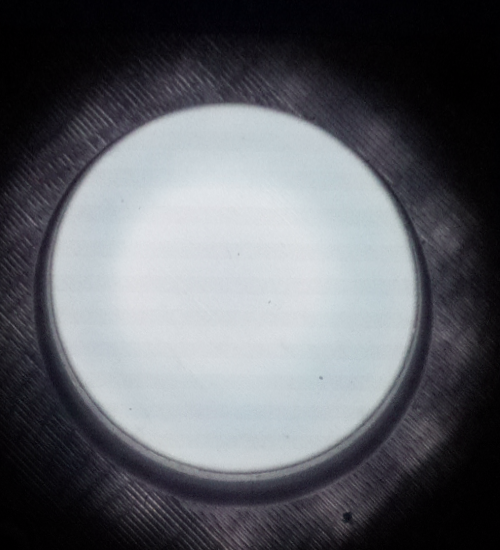

In [2]:
#calibration with already taken images
ltable = os.path.join(".","calibration","lighttable.png")


needle_dict = rm.colonyPicker.calculate_needle_positions()

img_tf,vector_tf = robocam.needle_jog_calibration(ltable,needle_dict)

pp_image = cv2.imread(ltable)
pp_image = cv2.warpPerspective(pp_image,img_tf,(500,550)) #transforming the calibrated image
cv2.imwrite('testimage.png',pp_image)
display(Image(filename="testimage.png"))

#print(vector_tf)
#print(needle_middle)
#print(new_point)

In [ ]:
motionsystem = rm.colonyPicker({},{},'/dev/serial0',19200)
#get a plate from A1 and put it on the backlight
#take a picture of a plate
imname = "sharpie_dots_3.png"
impath = os.path.join(".","pictures",imname)

motionsystem.get_plate("A1")
motionsystem.put_plate("0","plate_backlight","up")
motionsystem.grab_lid()
#go up after grabbing the lid to avoid the induction heater
motionsystem.move_robot(pz = 68)
#move back so the camera can see the plate
motionsystem.move_robot(px=motionsystem.robopos["neutral_position"]["0"]["X"])
motionsystem.light_on(.7) #lights on
motionsystem.send_gcode_multiline(["M400"]) #wait for movement before the next part
platepic = robocam.capture(savepath=impath) #take a picture
motionsystem.light_off() #done taking a picture so light off



In [4]:
#just take the picture
imname = "sharpie_dots_3.png"
impath = os.path.join(".","pictures",imname)
motionsystem.light_on(.7) #lights on
motionsystem.send_gcode_multiline(["M400"]) #wait for movement before the next part
platepic = robocam.capture(savepath=impath) #take a picture
motionsystem.light_off() #done taking a picture so light off
kp = robocam.detect_colonies(imname,img_tf,vector_tf,True,False,mincir=.5,minin=.3,mincon=.8,mina = 30,maxa=500)

NameError: name &#39;motionsystem&#39; is not defined

In [ ]:
#imname = "sharpie_dots_3.png"
#kp = robocam.detect_colonies(imname,img_tf,vector_tf,True,False,mincir=.5,minin=.3,mincon=.8,mina = 30,maxa=500)
tweak_x = 3.6
tweak_y = 0
for point in kp:
    print("image point is "+str(point.pt))
    image_pt = point.pt
    image_pt = (image_pt[0],image_pt[1],1)
    robot_point = np.dot(vector_tf,np.array(image_pt,np.float32))
    print(robot_point)
    motionsystem.move_robot(pz = 68)
    motionsystem.move_robot(px=robot_point[0]+tweak_x,py=robot_point[1]+tweak_y)
    motionsystem.move_robot(pz = 16)
    motionsystem.send_gcode_multiline(["M400"])
    platepic = robocam.capture(savepath="testimage.png") #take a picture
    #warp it so it looks good
    pp_image = cv2.imread("testimage.png")
    pp_image = cv2.warpPerspective(pp_image,img_tf,(500,550)) #transforming the calibrated image
    cv2.imwrite('testimage.png',pp_image)
    #show the picture
    display(Image(filename="testimage.png"))
    motionsystem.move_robot(pz = 68)
motionsystem.move_robot(px=motionsystem.robopos["neutral_position"]["0"]["X"])

In [ ]:
#put plate back
motionsystem.place_lid() #replace the lid
motionsystem.get_plate("0","plate_backlight","up") #pick up the plate
motionsystem.put_plate("A1") #store it in the right place

In [3]:
import matplotlib.pyplot as plt
import peakutils.peak
threshold = 1

imlist = ["A1_calib.png","A2_calib.png","A3_calib.png","B1_calib.png","B1_empty.png","B2_empty.png","B3_empty.png"]
#imlist = ["A1_calib.png"]
#imlist = ["sharpie_dots_3.png"]
ltable = os.path.join(".","calibration","lighttable.png")
needle_dict = rm.colonyPicker.calculate_needle_positions()

img_tf,vector_tf = robocam.needle_jog_calibration(ltable,needle_dict)




for impath in imlist:
    kp = robocam.detect_colonies(impath,img_tf,vector_tf,False,False,mincir=.5,minin=.3,mincon=.8,mina = 30,maxa=500)
    if(len(kp)>0):
        print(kp[0].pt, kp[0].size)

    
#cv2.imwrite('testimage.png',warp)
#display(Image(filename='testimage.png'))

95
(219.74166870117188, 353.2583312988281) 7.246623516082764
58
(168.16888427734375, 352.5733337402344) 7.052032470703125
60
(195.38577270507812, 371.47564697265625) 7.8450751304626465
89
(280.18853759765625, 366.1986389160156) 7.965649604797363
0
0
2
(280.6170349121094, 314.54254150390625) 7.73514986038208
